### Project Breast Cancer detection (classification) -Nehal Bendale

### About Dataset
Breast cancer is the most common cancer amongst women in the world. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.
The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). classifying these tumors using machine learning algorithms. 

Data Source - Kaggle

### Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn import tree
from sklearn import metrics
from xgboost.sklearn import XGBClassifier 
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [93]:
df=pd.read_csv('breast_cancer_detection.csv')
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [95]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [96]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [97]:
df=df.drop(['id','Unnamed: 32'],axis=1)

In [98]:
df.shape

(569, 31)

In [99]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [101]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [102]:
df['diagnosis'].nunique()

2

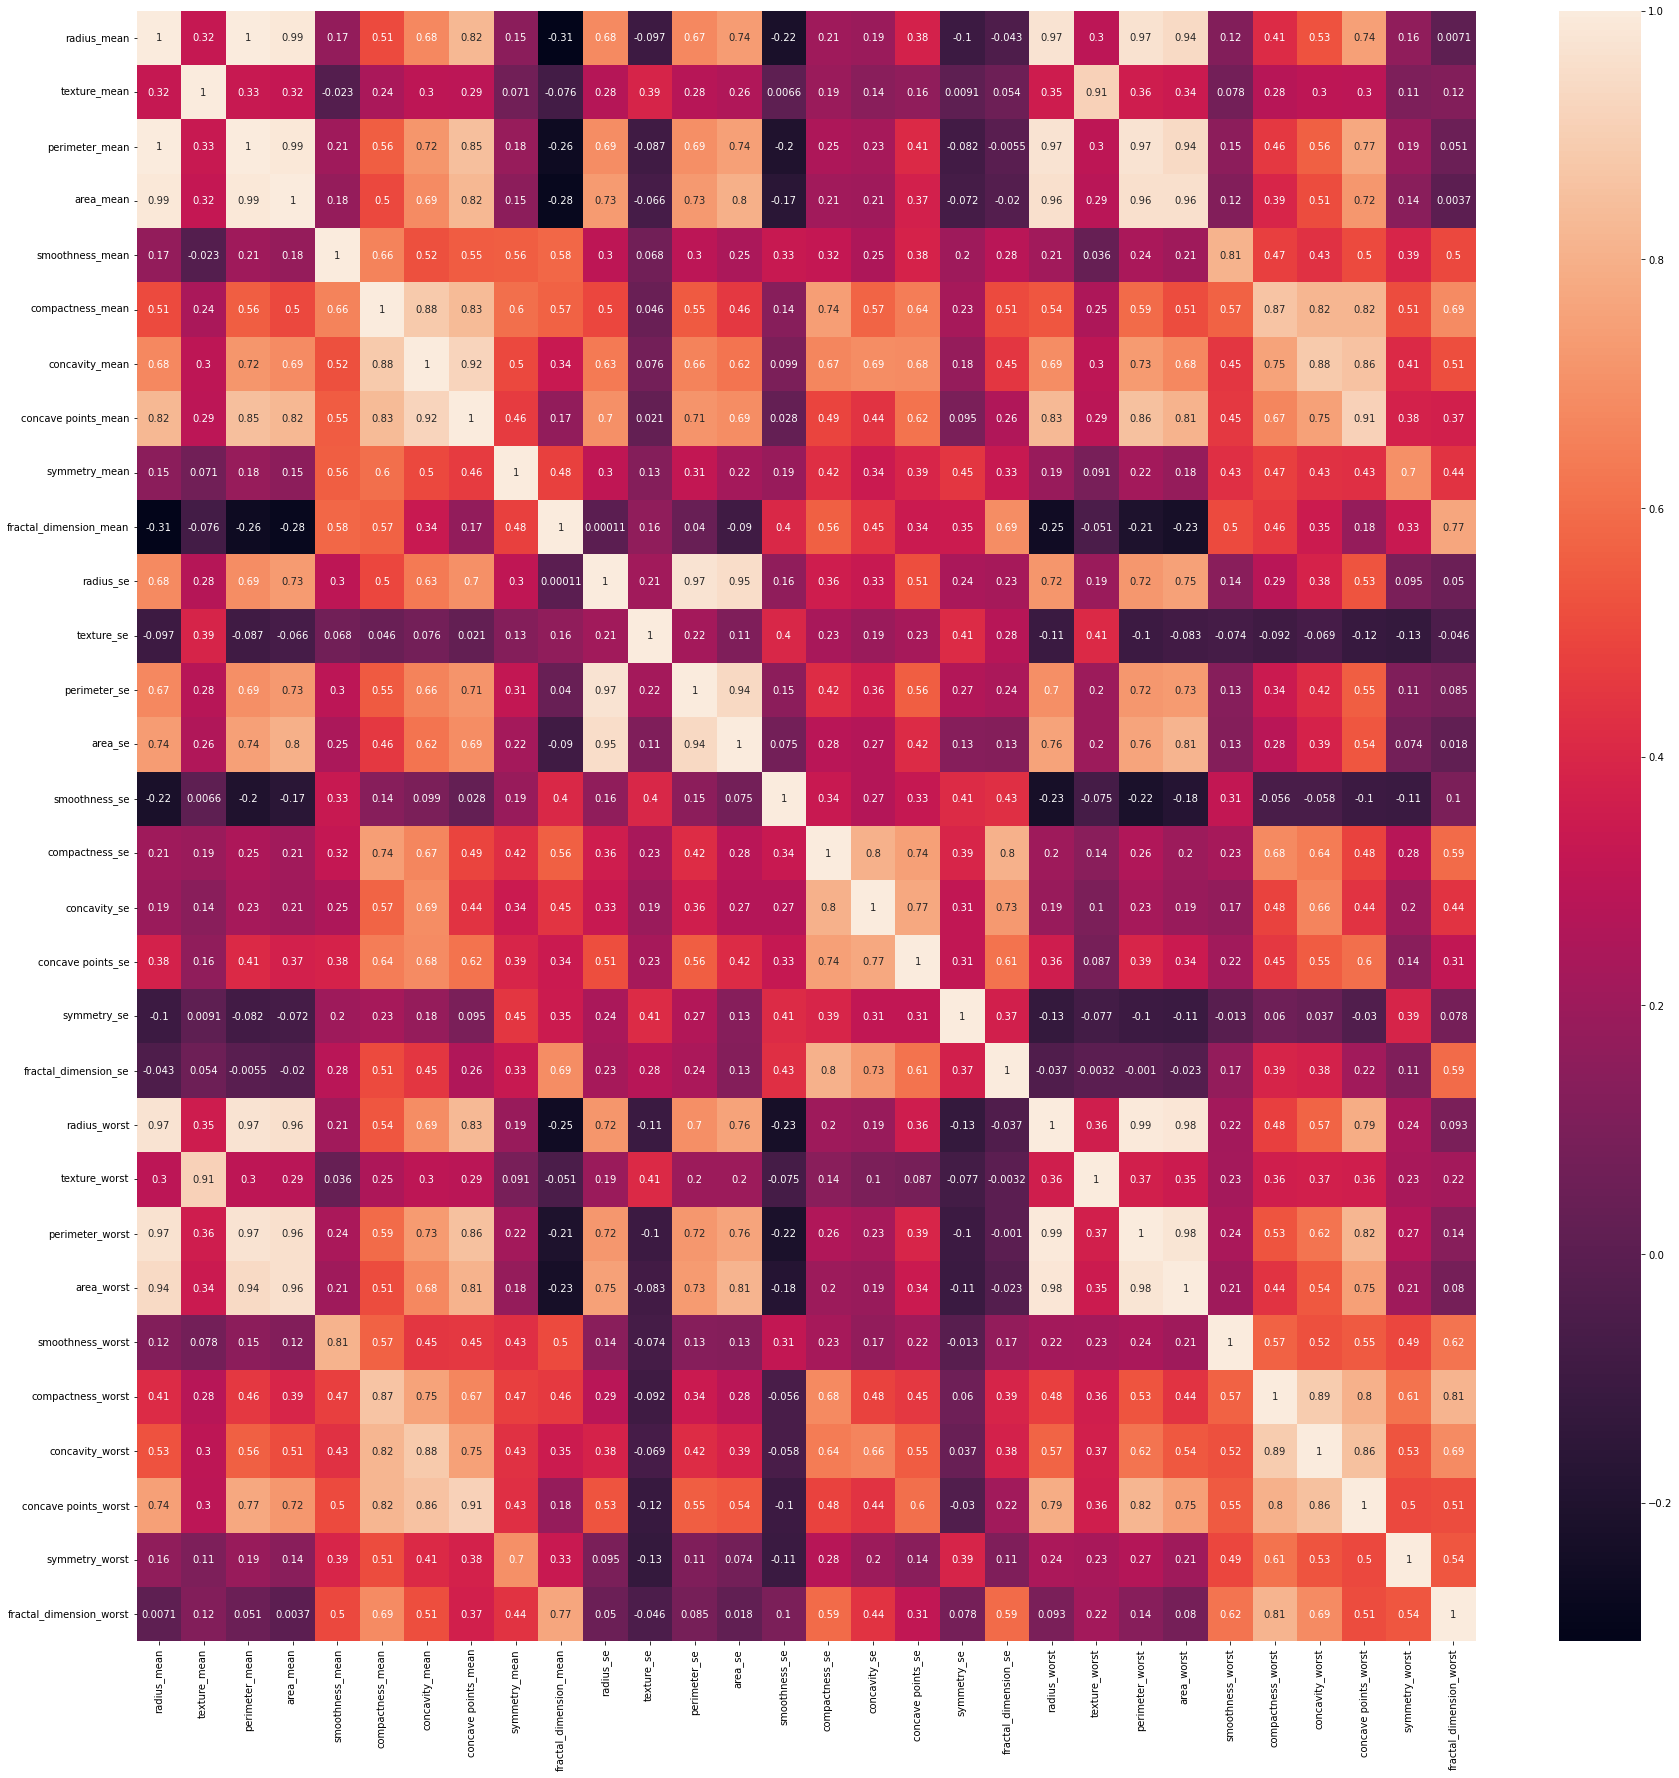

In [103]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True)
plt.show()

<Figure size 720x720 with 0 Axes>

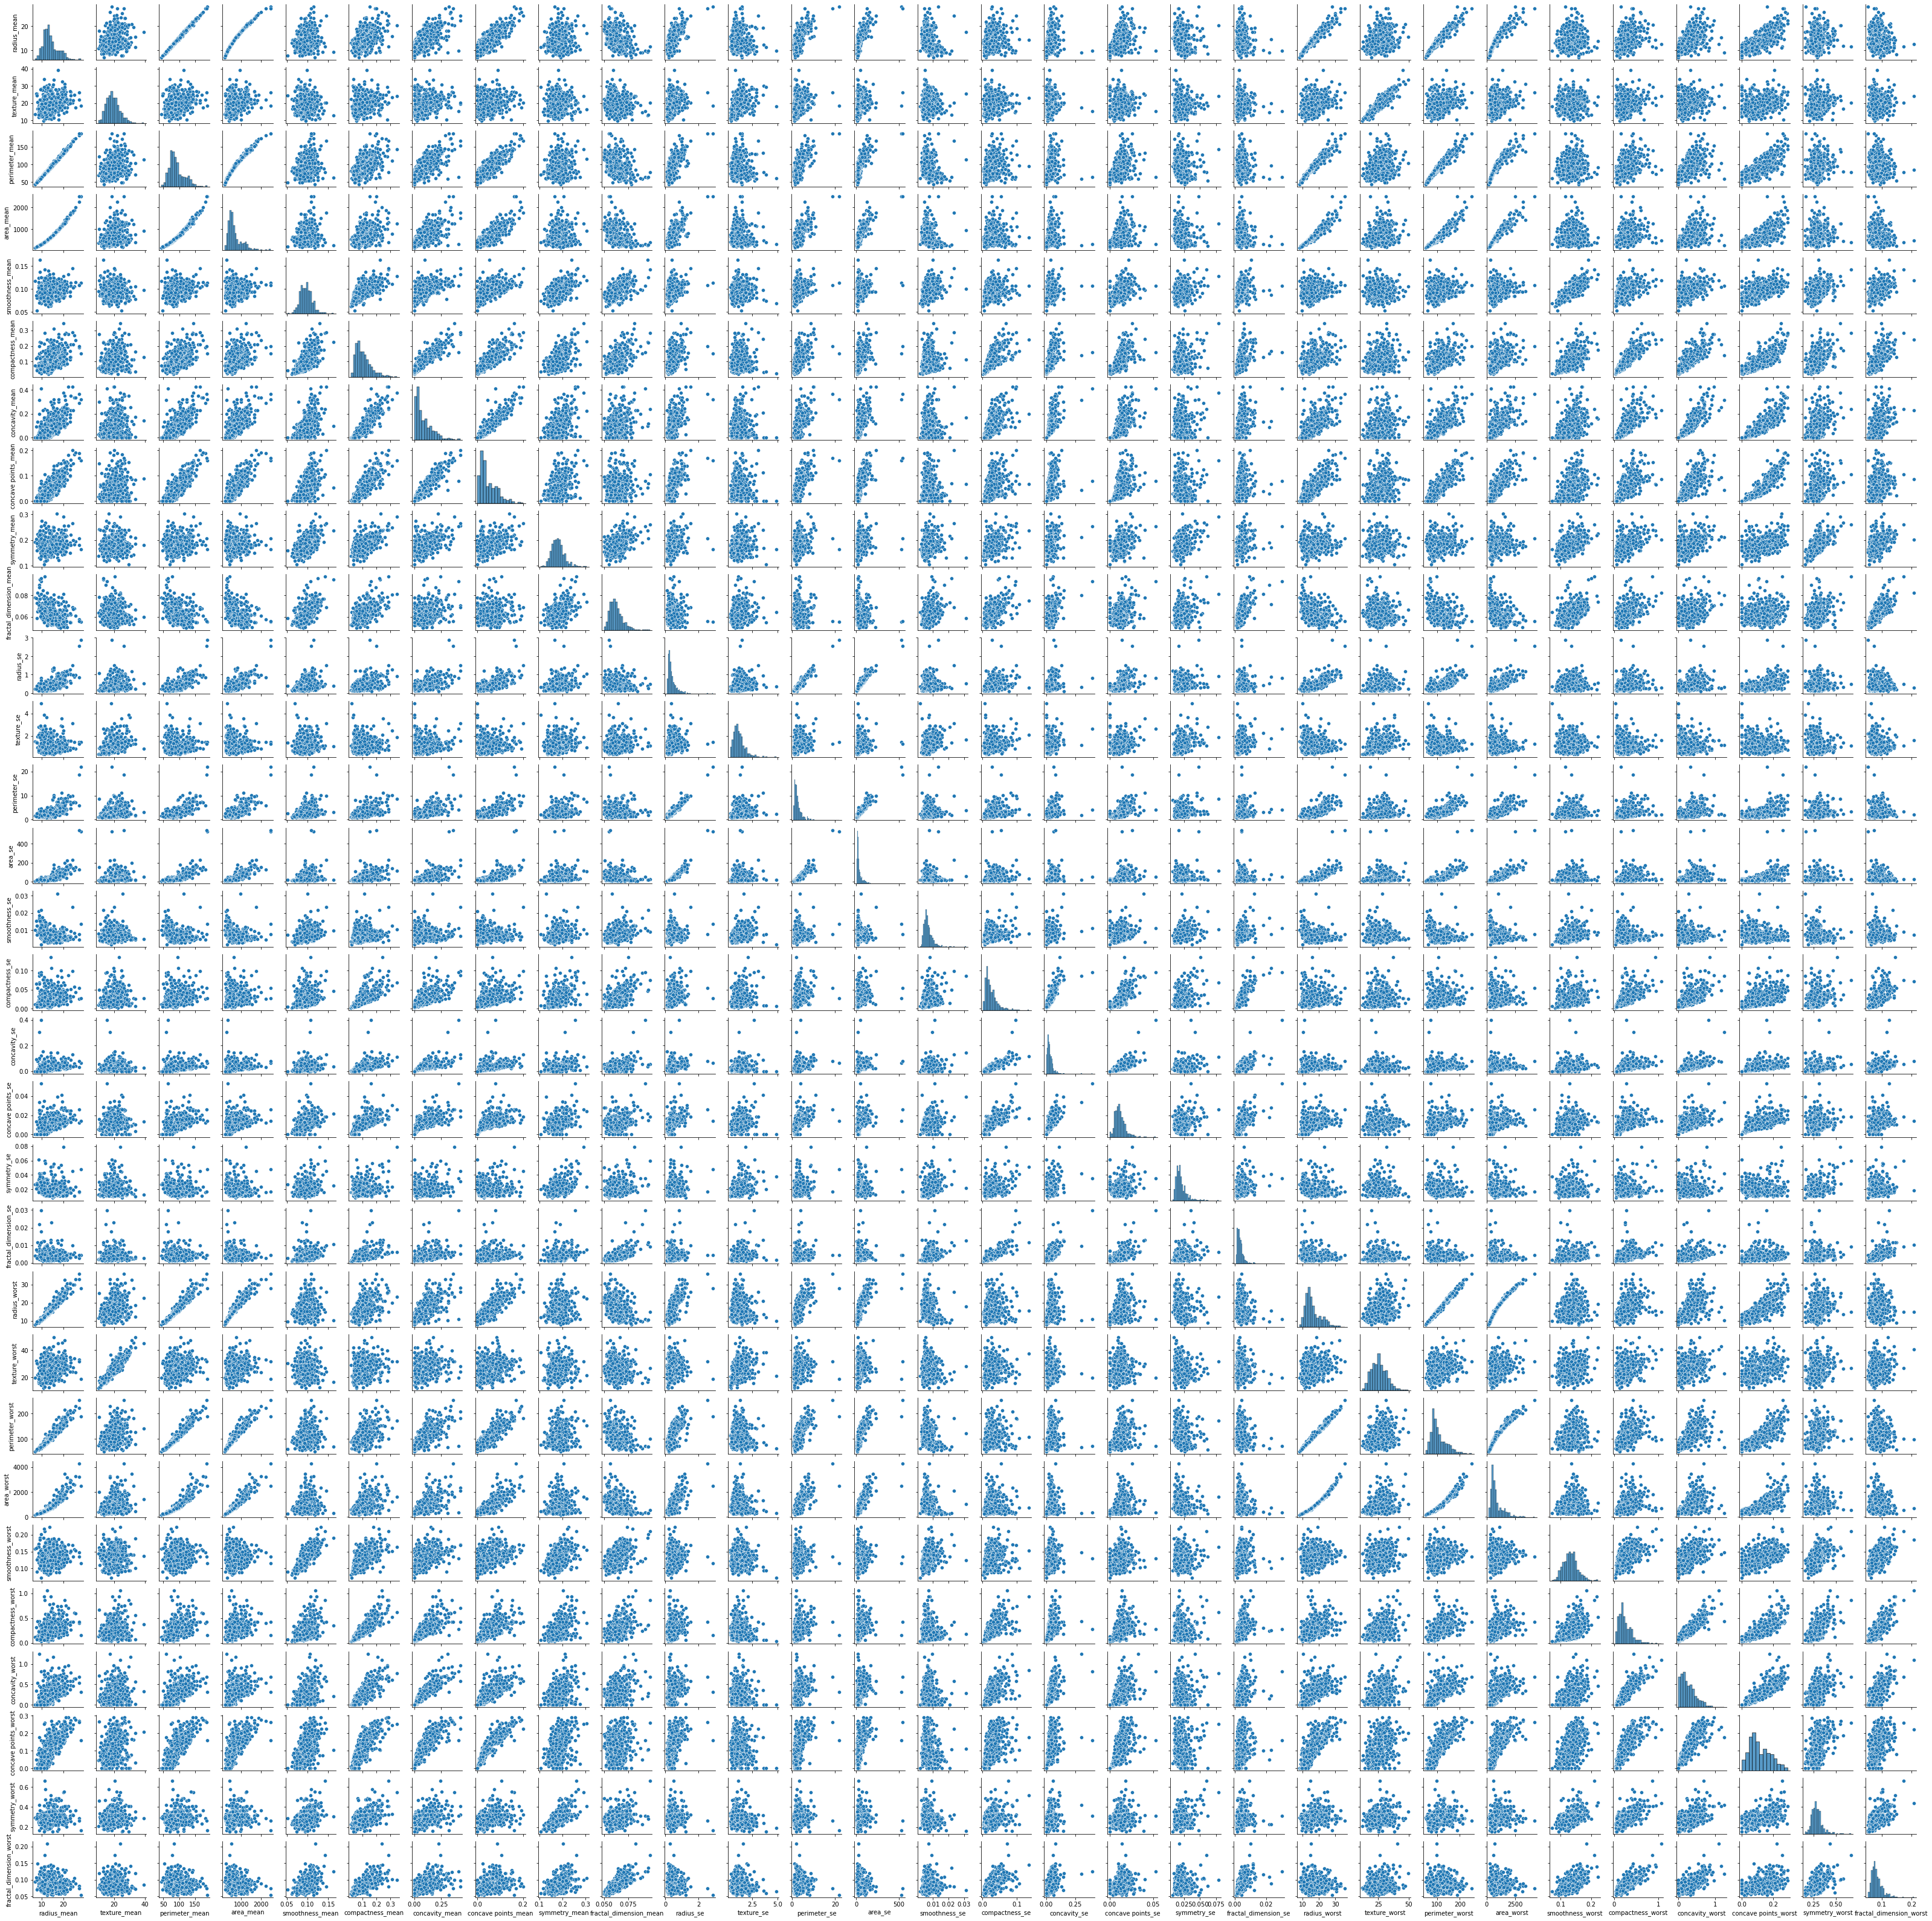

In [104]:
plt.figure(figsize=(10,10))
sns.pairplot(data=df,height=1.5)
plt.show()

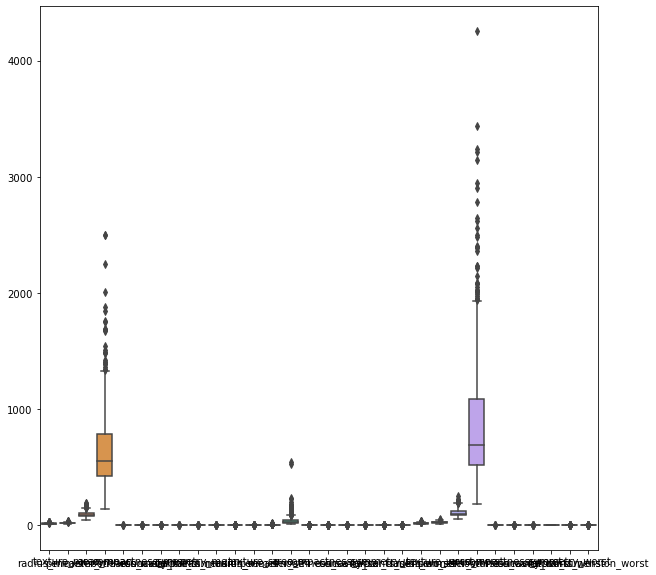

In [105]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.show()

In [106]:
for cols in df.columns[1:]:
    if df[cols].dtype == object:
        continue
    else:
        Q1 = df[cols].quantile(q=0.25)
        Q3 = df[cols].quantile(q=0.75)
        iqr = Q3 - Q1
    
        low = Q1 - 1.5*(Q3-Q1)
        high = Q3 + 1.5*(Q3-Q1)
        df.loc[(df[cols]<low) | (df[cols]>high),cols] = df[cols].median()

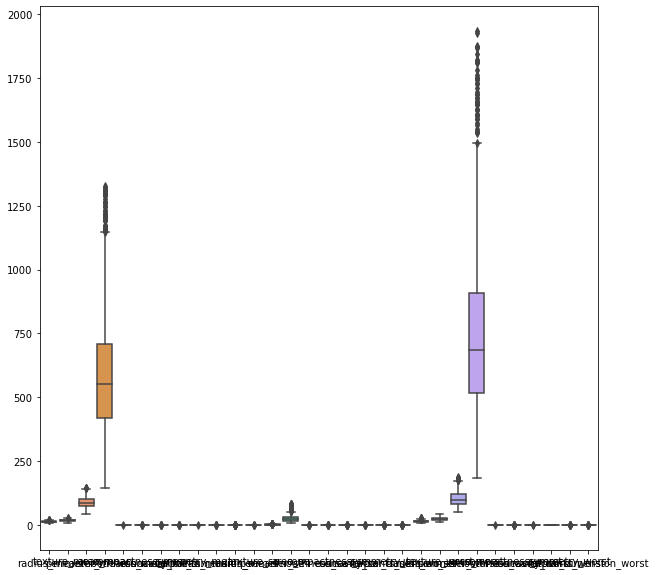

In [107]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.show()

In [108]:
cat=pd.get_dummies(df['diagnosis'])
cat

B  M
0    0  1
1    0  1
2    0  1
3    0  1
4    0  1
..  .. ..
564  0  1
565  0  1
566  0  1
567  0  1
568  1  0

[569 rows x 2 columns]

In [109]:
df=pd.concat([df,cat],axis=1)
df

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00      551.1   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.09263         0.06154              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.09587           0.09263         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.09263         0.06154              0.15200   
568          0.09587           0.04362         0.00000              0.00000   

     symmetry_mean  ...  perimeter_worst  area_worst  smoothness_worst  \
0           0.2419  ...           184.60       686.5           0.16220   
1           0.1812  ...           158.80       686.5           0.12380   
2           0.2069  ...           152.50      1709.0           0.14440   
3           0.1792  ...            98.87       567.7           0.13130   
4           0.1809  ...           152.20      1575.0           0.13740   
..             ...  ...              ...         ...               ...   
564         0.1726  ...           166.10       686.5           0.14100   
565         0.1752  ...           155.00      1731.0           0.11660   
566         0.1590  ...           126.70      1124.0           0.11390   
567         0.2397  ...           184.60      1821.0           0.16500   
568         0.1587  ...            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.21190           0.7119                0.2654          0.2822   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.21190           0.6869                0.2575          0.2822   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.21190           0.2267                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  B  M  
0                    0.11890  0  1  
1                    0.08902  0  1  
2                    0.08758  0  1  
3                    0.08004  0  1  
4                    0.07678  0  1  
..                       ... .. ..  
564                  0.07115  0  1  
565                  0.06637  0  1  
566    

In [110]:
df=df.drop(['diagnosis','B'],axis=1)

In [111]:
df

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.09587   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00      551.1          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.09587   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.09263         0.06154              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.09263         0.24140              0.10520         0.1792   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.09263         0.06154              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                   0.07871  ...          17.33           184.60       686.5   
1                   0.05667  ...          23.41           158.80       686.5   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.06154  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10       686.5   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.21190           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.13130            0.21190           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.21190           0.2267   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  M  
0                  0.2654          0.2822                  0.11890  1  
1                  0.1860          0.2750                  0.08902  1  
2                  0.2430          0.3613                  0.08758  1  
3                  0.2575          0.2822                  0.08004  1  
4                  0.1625          0.2364                  0.07678  1  
..               

In [112]:
X=df.drop('M',axis=1)
Y=df['M']

In [113]:
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,Y,test_size=0.2,random_state=42)

### Logistics regression

In [115]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [116]:
model.score(X_train,y_train)

0.9692307692307692

In [117]:
model.score(X_test,y_test)

0.9824561403508771

In [118]:
y_pred=model.predict(X_test)

In [119]:
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[70,  1],
       [ 1, 42]], dtype=int64)

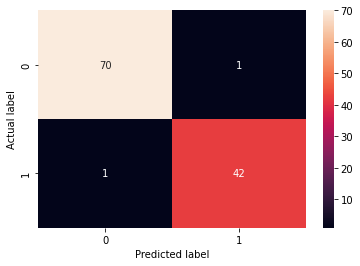

In [120]:
sns.heatmap(cnf_matrix,annot=True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [121]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9824561403508771
Precision: 0.9767441860465116
Recall: 0.9767441860465116


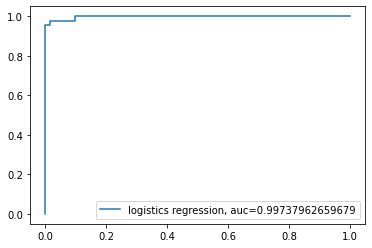

In [122]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="logistics regression, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Navie Bays

In [123]:
NB=BernoulliNB()
#Fit
NB.fit(X_train,y_train)

BernoulliNB()

In [124]:
#Training and testing score
print("Training score is",NB.score(X_train,y_train))
print("Testing score is",NB.score(X_test,y_test))

Training score is 0.9032967032967033
Testing score is 0.9385964912280702


In [125]:
#Classification Report
predict_NB_x=NB.predict(X_test)
print(classification_report(y_test,predict_NB_x))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



In [126]:
#Performance Parameters
print("Accuracy is ",metrics.accuracy_score(y_test,predict_NB_x))
print("precsion is ",metrics.precision_score(y_test,predict_NB_x))
print("recall is ",metrics.recall_score(y_test,predict_NB_x))

Accuracy is  0.9385964912280702
precsion is  0.9090909090909091
recall is  0.9302325581395349


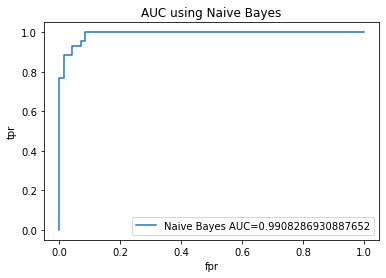

In [127]:
#AUC value
predict_NB=NB.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_NB)
auc=roc_auc_score(y_test,predict_NB)
plt.plot(fpr,tpr,label="Naive Bayes AUC="+str(auc))
plt.title("AUC using Naive Bayes")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show();

### KNN

In [128]:
#Algoritm
KNN=KNeighborsClassifier()
#Fit
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [129]:
#Training and testing score
print("Training score is",KNN.score(X_train,y_train))
print("Testing score is",KNN.score(X_test,y_test))

Training score is 0.9714285714285714
Testing score is 0.9649122807017544


In [130]:
#Classification Report
predict_KNN_x=KNN.predict(X_test)
print(classification_report(y_test,predict_KNN_x))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [131]:
#Performance parameters
print("Accuracy is ",metrics.accuracy_score(y_test,predict_KNN_x))
print("precsion is ",metrics.precision_score(y_test,predict_KNN_x))
print("recall is ",metrics.recall_score(y_test,predict_KNN_x))

Accuracy is  0.9649122807017544
precsion is  0.9534883720930233
recall is  0.9534883720930233


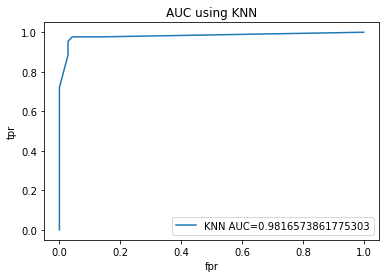

In [132]:
#AUC value
predict_KNN=KNN.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_KNN)
auc=roc_auc_score(y_test,predict_KNN)
plt.plot(fpr,tpr,label="KNN AUC="+str(auc))
plt.title("AUC using KNN")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show();

### SVM

In [133]:
#Algoritm
SVM=SVC(probability=True)
#Fit
SVM.fit(X_train,y_train)

SVC(probability=True)

In [134]:
#Training and testing score
print("Training score is",SVM.score(X_train,y_train))
print("Testing score is",SVM.score(X_test,y_test))

Training score is 0.989010989010989
Testing score is 0.9649122807017544


In [135]:
#Classification Report
predict_SVM_x=SVM.predict(X_test)
print(classification_report(y_test,predict_SVM_x))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [136]:
#Performance Parameters
print("Accuracy is ",metrics.accuracy_score(y_test,predict_SVM_x))
print("precsion is ",metrics.precision_score(y_test,predict_SVM_x))
print("recall is ",metrics.recall_score(y_test,predict_SVM_x))

Accuracy is  0.9649122807017544
precsion is  0.9534883720930233
recall is  0.9534883720930233


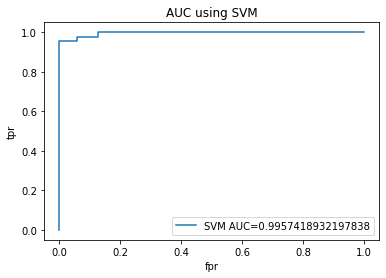

In [137]:
#AUC value
predict_SVM=SVM.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_SVM)
auc=roc_auc_score(y_test,predict_SVM)
plt.plot(fpr,tpr,label="SVM AUC="+str(auc))
plt.title("AUC using SVM")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show();

### Descision tree

In [138]:
#Algoritm
DT=DecisionTreeClassifier()
#Fit
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [139]:
#Traing and testing score
print("Traning score is",DT.score(X_train,y_train))
print("Testing score is",DT.score(X_test,y_test))

Traning score is 1.0
Testing score is 0.9210526315789473


In [140]:
#Classification Report
predict_DT=DT.predict(X_test)
print(classification_report(y_test,predict_DT))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        71
           1       0.89      0.91      0.90        43

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



In [141]:
#Performance Parameters
print("Accuracy is ",metrics.accuracy_score(y_test,predict_DT))
print("precsion is ",metrics.precision_score(y_test,predict_DT))
print("recall is ",metrics.recall_score(y_test,predict_DT))

Accuracy is  0.9210526315789473
precsion is  0.8863636363636364
recall is  0.9069767441860465


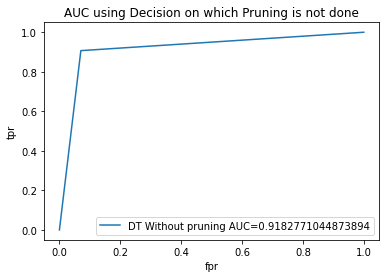

In [142]:
#AUC value
predict_DT=DT.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_DT)
auc=roc_auc_score(y_test,predict_DT)
plt.plot(fpr,tpr,label="DT Without pruning AUC="+str(auc))
plt.title("AUC using Decision on which Pruning is not done")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show()

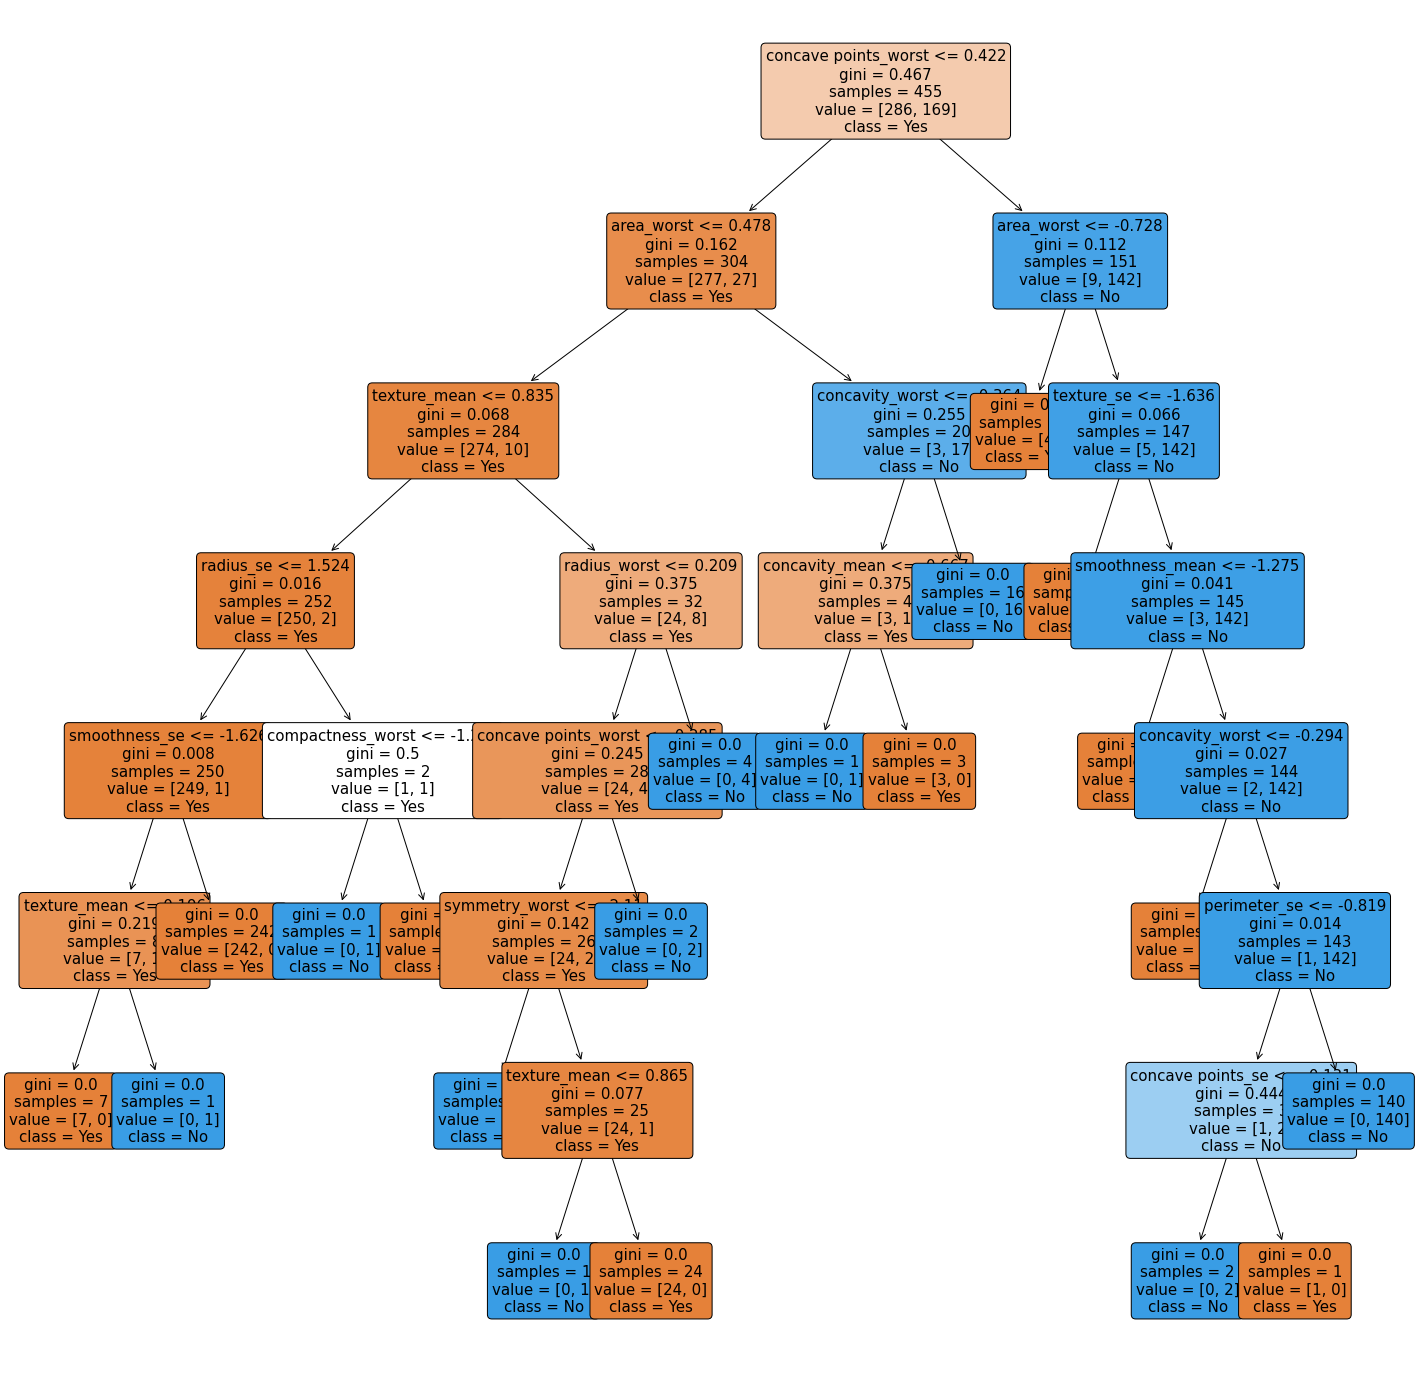

In [143]:
#Tree
plt.figure(figsize=(25,25)) 
figure=tree.plot_tree(DT,feature_names=X.columns[::],class_names=["Yes","No"],filled=True,rounded=True,fontsize=15);

In [144]:
#Pruning
#Parameters
hyper_params=dict(criterion=['gini'],max_depth=list(range(1,600)),min_samples_split=list(range(1,600)),min_samples_leaf=list(range(1,600)))
#Gridsearch
Random=RandomizedSearchCV(DT,param_distributions=hyper_params,scoring="accuracy",cv=10)
#Fit
Random.fit(X_train,y_train)
#Best estimators
Random.best_estimator_

DecisionTreeClassifier(max_depth=44, min_samples_leaf=114,
                       min_samples_split=222)

In [145]:
#Algoritm
DT_P=DecisionTreeClassifier(max_depth=274, min_samples_leaf=101,
                       min_samples_split=215)
#Fit
DT_P.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=274, min_samples_leaf=101,
                       min_samples_split=215)

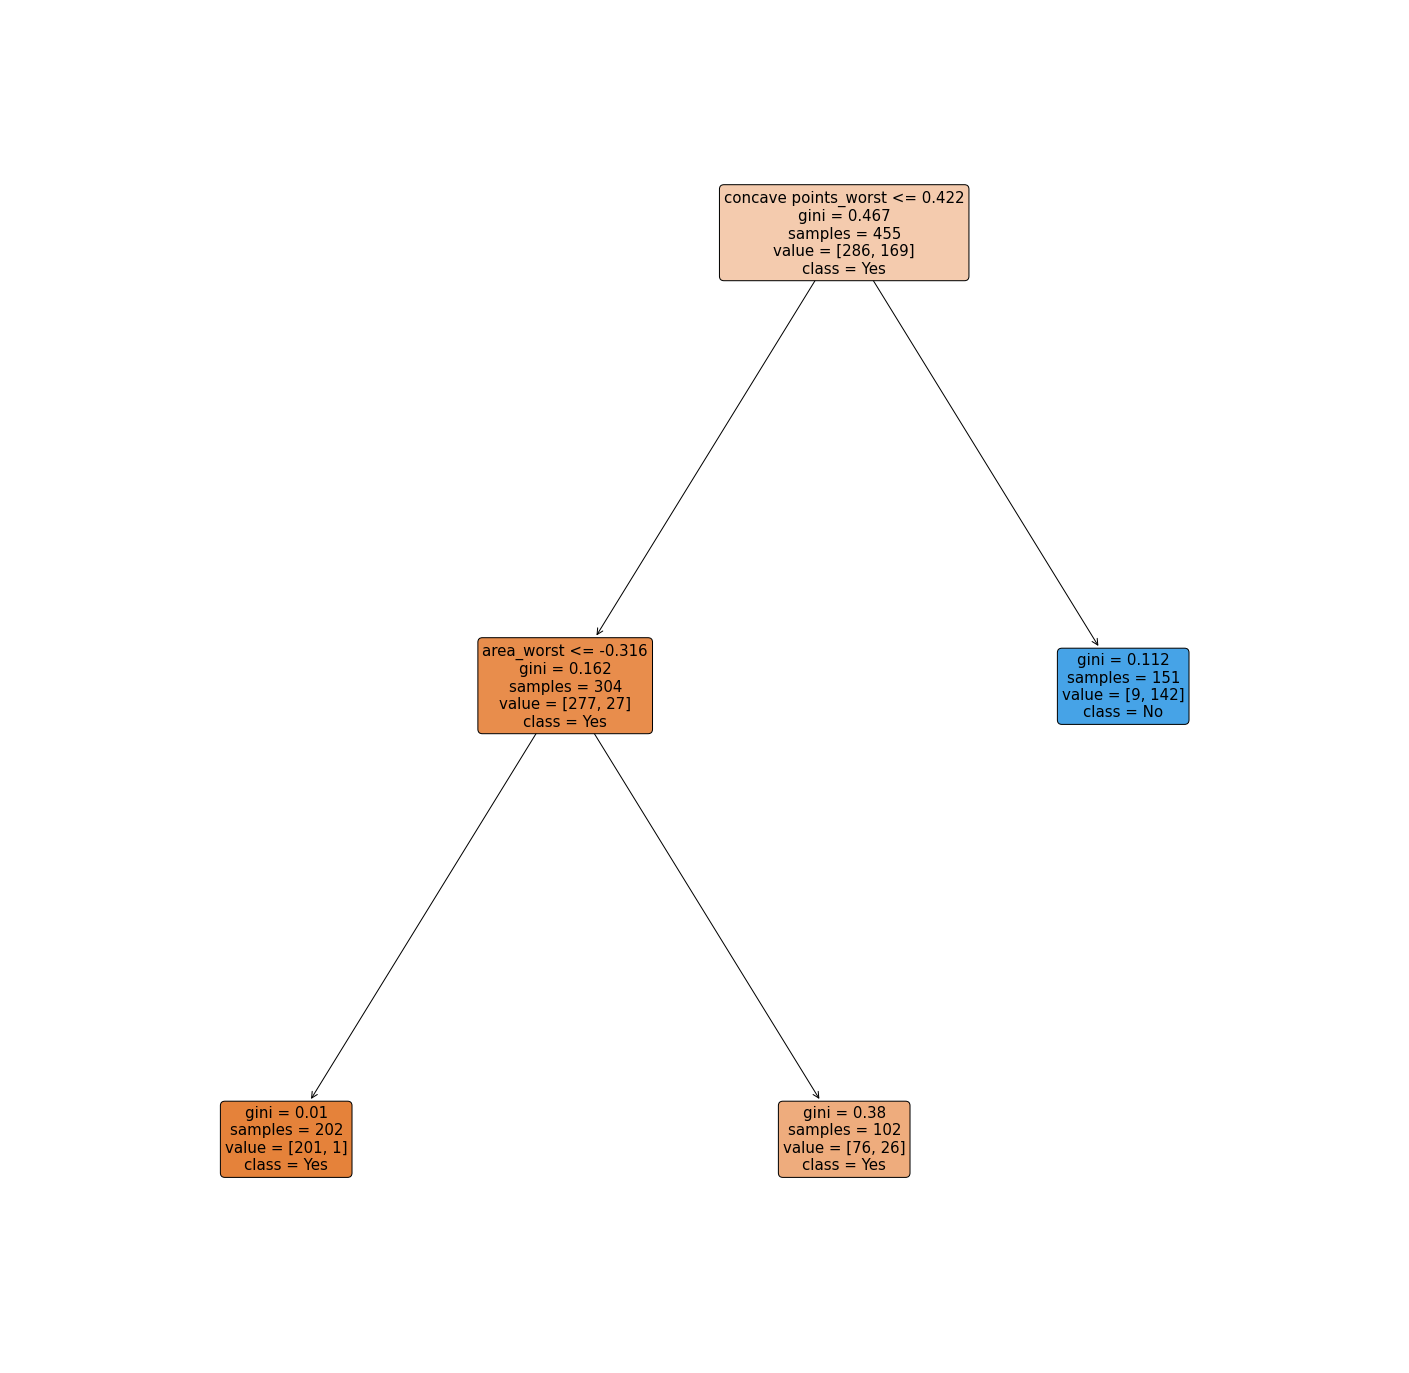

In [146]:
#Tree
plt.figure(figsize=(25,25)) 
figure=tree.plot_tree(DT_P,feature_names=X.columns[::],class_names=["Yes","No"],filled=True,rounded=True,fontsize=15);

In [147]:
#Traing and testing score
print("Traning score is",DT_P.score(X_train,y_train))
print("Testing score is",DT_P.score(X_test,y_test))

Traning score is 0.9208791208791208
Testing score is 0.9122807017543859


In [148]:
#Classification Report
predict_DT_P=DT_P.predict(X_test)
print(classification_report(y_test,predict_DT_P))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93        71
           1       0.92      0.84      0.88        43

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



In [149]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,predict_DT_P))
print("precsion is ",metrics.precision_score(y_test,predict_DT_P))
print("recall is ",metrics.recall_score(y_test,predict_DT_P))

Accuracy is  0.9122807017543859
precsion is  0.9230769230769231
recall is  0.8372093023255814


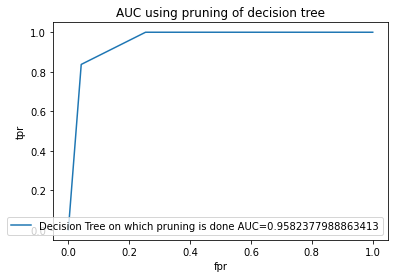

In [150]:
#AUC value
predict_DT_P=DT_P.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_DT_P)
auc=roc_auc_score(y_test,predict_DT_P)
plt.plot(fpr,tpr,label="Decision Tree on which pruning is done AUC="+str(auc))
plt.title("AUC using pruning of decision tree")
plt.legend(loc=4)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show();

### Random forest

In [151]:
#Agorithm
RF=RandomForestClassifier(n_estimators=1000)
#Fit
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [152]:
#Traning and testing score
print("Training score is",RF.score(X_train,y_train))
print("Testing score is",RF.score(X_test,y_test))

Training score is 1.0
Testing score is 0.956140350877193


In [153]:
#Classification Report
predict_RF=RF.predict(X_test)
print(classification_report(y_test,predict_RF))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [154]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,predict_RF))
print("precsion is ",metrics.precision_score(y_test,predict_RF))
print("recall is ",metrics.recall_score(y_test,predict_RF))

Accuracy is  0.956140350877193
precsion is  0.9523809523809523
recall is  0.9302325581395349


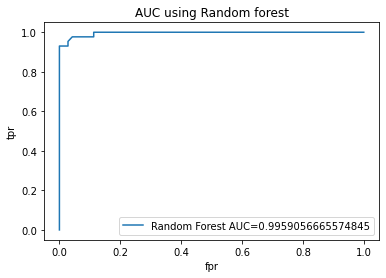

In [155]:
#AUC value
predict_RF=RF.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_RF)
auc=roc_auc_score(y_test,predict_RF)
plt.plot(fpr,tpr,label="Random Forest AUC="+str(auc))
plt.title("AUC using Random forest")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show()

### Extra trees

In [156]:
#Algoritm
ET=ExtraTreesClassifier(n_estimators=10)
#Fit 
ET.fit(X_train,y_train)

ExtraTreesClassifier(n_estimators=10)

In [157]:
#Traning and testing score
print("Training score is",ET.score(X_train,y_train))
print("Testing score is",ET.score(X_test,y_test))

Training score is 1.0
Testing score is 0.9736842105263158


In [158]:
#Classification Report
predict_ET=ET.predict(X_test)
print(classification_report(y_test,predict_ET))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [159]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,predict_ET))
print("precsion is ",metrics.precision_score(y_test,predict_ET))
print("recall is ",metrics.recall_score(y_test,predict_ET))

Accuracy is  0.9736842105263158
precsion is  0.9761904761904762
recall is  0.9534883720930233


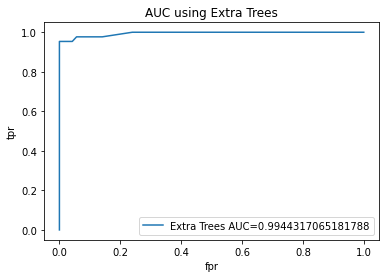

In [160]:
#AUC value
predict_ET=ET.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_ET)
auc=roc_auc_score(y_test,predict_ET)
plt.plot(fpr,tpr,label="Extra Trees AUC="+str(auc))
plt.title("AUC using Extra Trees")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show();

### Bagging

In [161]:
#Algorithm
BC=BaggingClassifier()
#Fit
BC.fit(X_train,y_train)

BaggingClassifier()

In [162]:
#Traning and testing score
print("Training score is",BC.score(X_train,y_train))
print("Testing score is",BC.score(X_test,y_test))

Training score is 0.9934065934065934
Testing score is 0.956140350877193


In [163]:
#Classification Report
predict_BC=BC.predict(X_test)
print(classification_report(y_test,predict_BC))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [164]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,predict_BC))
print("precsion is ",metrics.precision_score(y_test,predict_BC))
print("recall is ",metrics.recall_score(y_test,predict_BC))

Accuracy is  0.956140350877193
precsion is  0.9523809523809523
recall is  0.9302325581395349


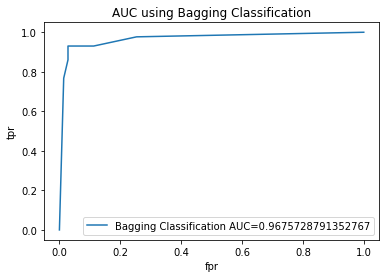

In [165]:
#AUC value
predict_BC=BC.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_BC)
auc=roc_auc_score(y_test,predict_BC)
plt.plot(fpr,tpr,label="Bagging Classification AUC="+str(auc))
plt.title("AUC using Bagging Classification")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show()

### Adaboost

In [166]:
#Algorithm
AB=AdaBoostClassifier()
#Fit
AB.fit(X_train,y_train)

AdaBoostClassifier()

In [167]:
#Traning and testing score
print("Training score is",AB.score(X_train,y_train))
print("Testing score is",AB.score(X_test,y_test))

Training score is 1.0
Testing score is 0.956140350877193


In [168]:
#Classification Report
predict_AB=AB.predict(X_test)
print(classification_report(y_test,predict_AB))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [169]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,predict_AB))
print("precsion is ",metrics.precision_score(y_test,predict_AB))
print("recall is ",metrics.recall_score(y_test,predict_AB))

Accuracy is  0.956140350877193
precsion is  0.9523809523809523
recall is  0.9302325581395349


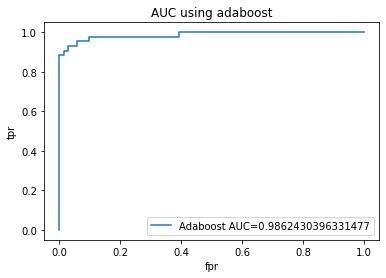

In [170]:
#AUC value
predict_AB=AB.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_AB)
auc=roc_auc_score(y_test,predict_AB)
plt.plot(fpr,tpr,label="Adaboost AUC="+str(auc))
plt.title("AUC using adaboost")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show()

### Gradient Boosting

In [171]:
#Algorithm
GB=GradientBoostingClassifier()
#Fit
GB.fit(X_train,y_train)

GradientBoostingClassifier()

In [172]:
#Traning and testing score
print("Training score is",GB.score(X_train,y_train))
print("Testing score is",GB.score(X_test,y_test))

Training score is 1.0
Testing score is 0.956140350877193


In [173]:
#Classification Report
predict_GB=GB.predict(X_test)
print(classification_report(y_test,predict_GB))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [174]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,predict_GB))
print("precsion is ",metrics.precision_score(y_test,predict_GB))
print("recall is ",metrics.recall_score(y_test,predict_GB))

Accuracy is  0.956140350877193
precsion is  0.9523809523809523
recall is  0.9302325581395349


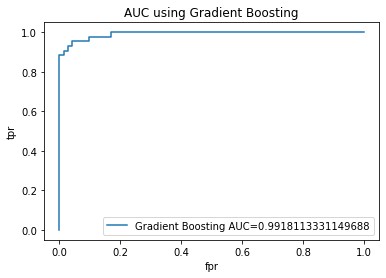

In [175]:
#AUC value
predict_GB=GB.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_GB)
auc=roc_auc_score(y_test,predict_GB)
plt.plot(fpr,tpr,label="Gradient Boosting AUC="+str(auc))
plt.title("AUC using Gradient Boosting")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show()

### XGboost

In [176]:
#Algorithm
XG=XGBClassifier()
#Fit
XG.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [177]:
#Traning and testing score
print("Training score is",XG.score(X_train,y_train))
print("Testing score is",XG.score(X_test,y_test))

Training score is 1.0
Testing score is 0.9649122807017544


In [178]:
#Classification Report
predict_XG=XG.predict(X_test)
print(classification_report(y_test,predict_XG))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [179]:
#Performance 
print("Accuracy is ",metrics.accuracy_score(y_test,predict_XG))
print("precsion is ",metrics.precision_score(y_test,predict_XG))
print("recall is ",metrics.recall_score(y_test,predict_XG))

Accuracy is  0.9649122807017544
precsion is  0.9534883720930233
recall is  0.9534883720930233


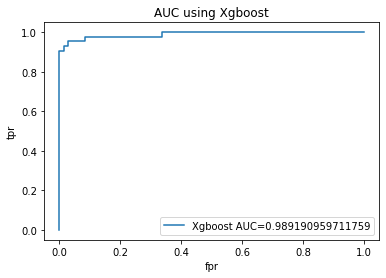

In [180]:
#AUC value
predict_XG=XG.predict_proba(X_test)[::,-1]
fpr,tpr,_=roc_curve(y_test,predict_XG)
auc=roc_auc_score(y_test,predict_XG)
plt.plot(fpr,tpr,label="Xgboost AUC="+str(auc))
plt.title("AUC using Xgboost")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend(loc=4)
plt.show()

#### Result

In [187]:
result=pd.DataFrame({"Algoritm":["Logistic Regression","Naive Bayes","KNN","SVM","Decision Tree","Decision Tree after Hyerparametric Tunning","Random Forest","Extra Trees","Bagging Classification","Adaboost","Gradient Boost","XgBoost"],
                     "Accuracy":[0.9824,0.9385,0.9649, 0.9649,0.9210,0.9122,0.9561,0.9649,0.9561, 0.9561,0.9561,0.9649],
                     "Precision":[0.9767,0.9090,0.9534,0.9534,0.8636,0.9230,0.9523,0.9534,0.975, 0.9523, 0.9523,0.9534],
                     "Recall":[0.9767,0.9302,0.9534,0.9534,0.8837,0.8372,0.9302,0.9534,0.9069, 0.9302,0.9302, 0.9534],
                     "AUC":[0.9973,0.9908,0.9816,0.9957,0.8996,0.9582,0.9954,0.9959,0.9688,0.9862,0.9914,0.9891]},index=list(range(1,13)))
result

Algoritm  Accuracy  Precision  Recall  \
1                          Logistic Regression    0.9824     0.9767  0.9767   
2                                  Naive Bayes    0.9385     0.9090  0.9302   
3                                          KNN    0.9649     0.9534  0.9534   
4                                          SVM    0.9649     0.9534  0.9534   
5                                Decision Tree    0.9210     0.8636  0.8837   
6   Decision Tree after Hyerparametric Tunning    0.9122     0.9230  0.8372   
7                                Random Forest    0.9561     0.9523  0.9302   
8                                  Extra Trees    0.9649     0.9534  0.9534   
9                       Bagging Classification    0.9561     0.9750  0.9069   
10                                    Adaboost    0.9561     0.9523  0.9302   
11                              Gradient Boost    0.9561     0.9523  0.9302   
12                                     XgBoost    0.9649     0.9534  0.9534   

       AUC  
1   0.9973  
2   0.9908  
3   0.9816  
4   0.9957  
5   0.8996  
6   0.9582  
7   0.9954  
8   0.9959  
9   0.9688  
10  0.9862  
11  0.9914  
12  0.9891

### Result

Conclusion=The performance of all the alogorithm is good enough.

We are choosing Logistics regression for future predictions as it has the highest AUC 0.99 value which is the best deciding factor when it comes to binomial classification.

### Prediction

In [191]:
#Actual value and the predicted value comparison
prediction= pd.DataFrame({'Actual value': y_test, 'Predicted value':model.predict(X_test)})
prediction.head()

Actual value  Predicted value
204             0                0
70              1                1
131             1                1
431             0                0
540             0                0